In [21]:
# In this repository we will use breast cancer data set to detect anomalies.
# In order to do that, we will:
# 1) Understand and prep data
# 2) train and evaluate model

In [22]:
from sklearn import datasets, ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

cancer_data = datasets.load_breast_cancer()
# print(cancer_data)


In [23]:
# Here, we see that cancer_data is like a dictionary with curly brackets and keys inside. 
# Now, let's see what these keys are with this command:

for key in cancer_data:
    print(key)

data
target
target_names
DESCR
feature_names


In [24]:
# In this anomaly example, we will follow an unsupervised approach. Thus, we don't need target and target_names
# which tells us whether it is malignant or benign.

print(cancer_data.data)
print(cancer_data.data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [25]:
print(cancer_data.feature_names)
print(cancer_data.feature_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


In [26]:
print(cancer_data.target)
print(cancer_data.target.shape)
#We will use target data only for graphing purposes.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [27]:
print(cancer_data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [28]:
features = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [29]:
print(features)
print(features.shape)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

In [30]:
targets = pd.DataFrame(cancer_data.target)

In [31]:
print(targets)
print(targets.shape)

     0
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   0
16   0
17   0
18   0
19   1
20   1
21   1
22   0
23   0
24   0
25   0
26   0
27   0
28   0
29   0
..  ..
539  1
540  1
541  1
542  1
543  1
544  1
545  1
546  1
547  1
548  1
549  1
550  1
551  1
552  1
553  1
554  1
555  1
556  1
557  1
558  1
559  1
560  1
561  1
562  0
563  0
564  0
565  0
566  0
567  0
568  1

[569 rows x 1 columns]
(569, 1)


mean radius


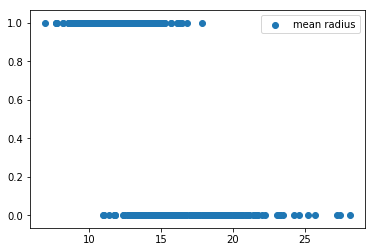

mean texture


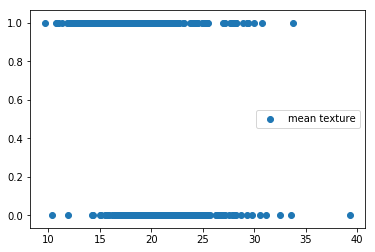

mean perimeter


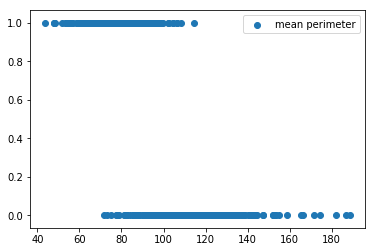

mean area


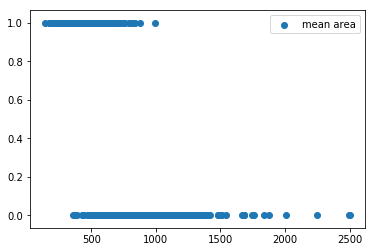

mean smoothness


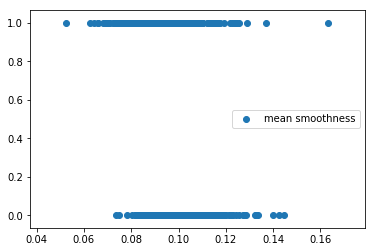

mean compactness


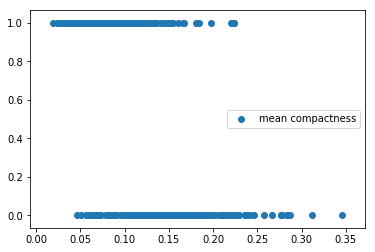

mean concavity


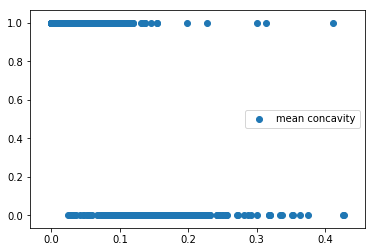

mean concave points


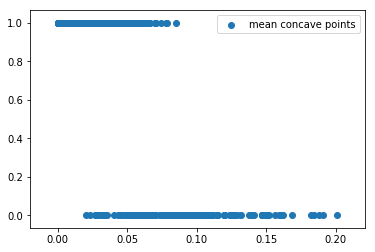

mean symmetry


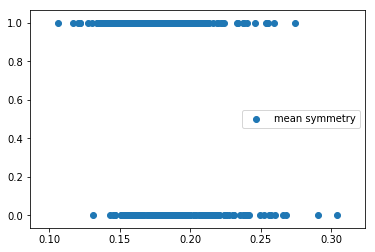

mean fractal dimension


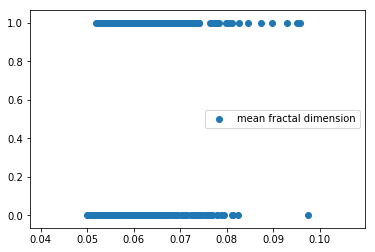

radius error


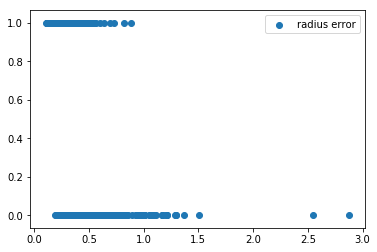

texture error


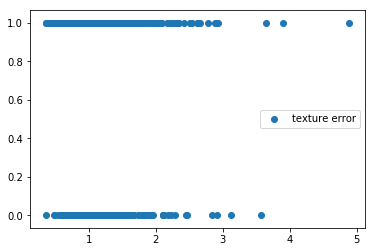

perimeter error


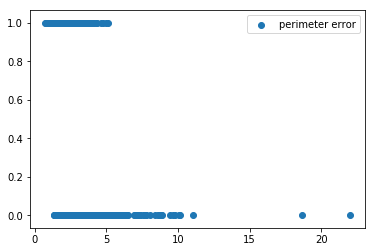

area error


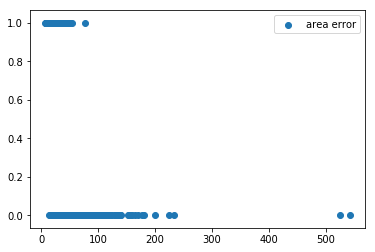

smoothness error


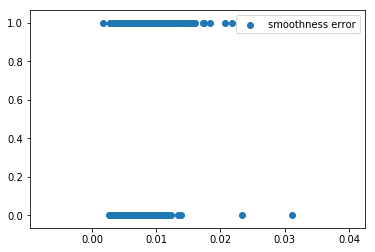

compactness error


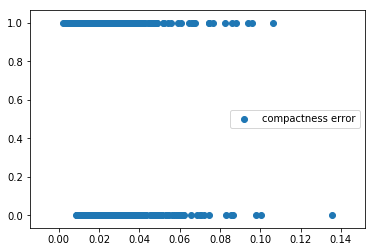

concavity error


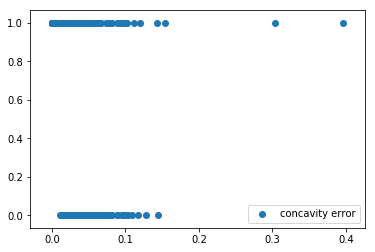

concave points error


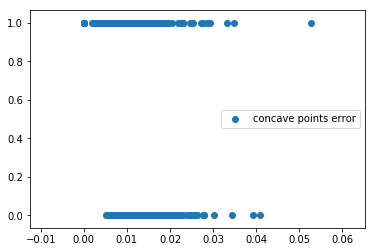

symmetry error


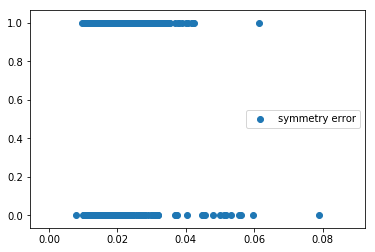

fractal dimension error


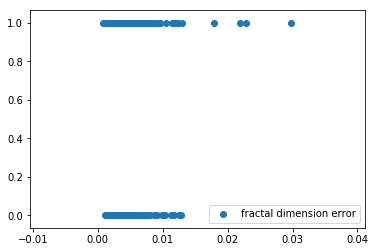

worst radius


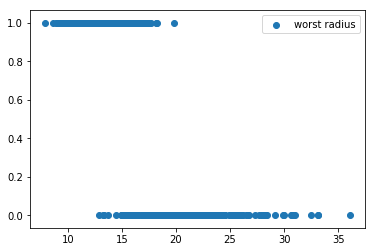

worst texture


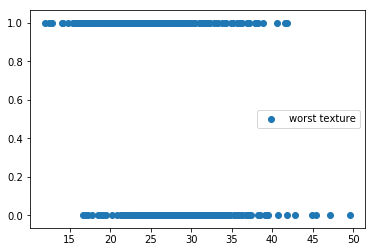

worst perimeter


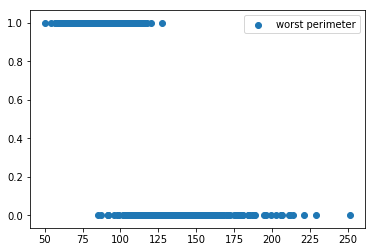

worst area


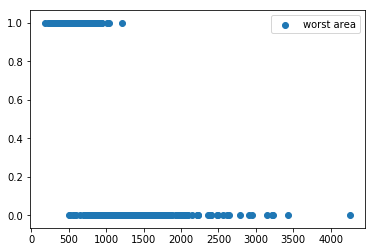

worst smoothness


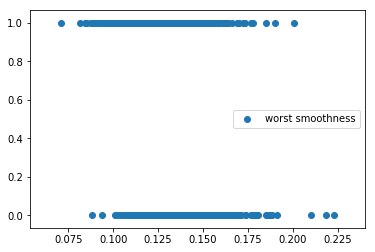

worst compactness


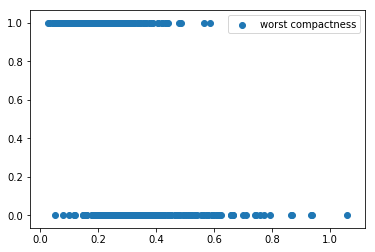

worst concavity


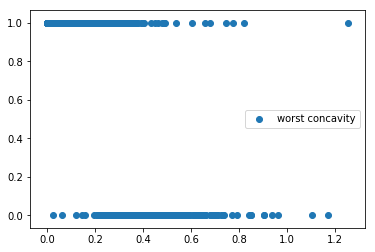

worst concave points


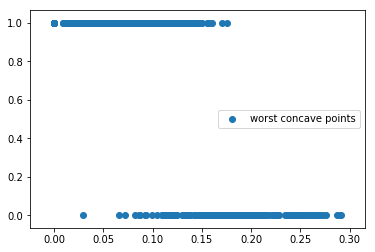

worst symmetry


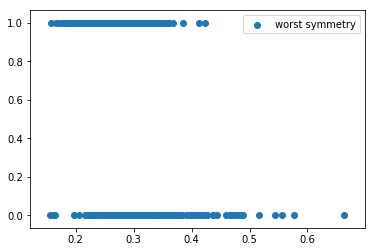

worst fractal dimension


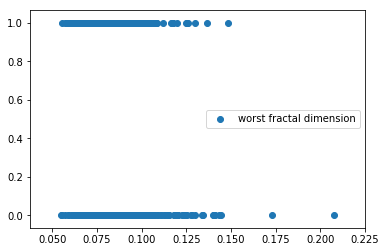

In [32]:
for feature_name in cancer_data.feature_names:
    print(feature_name)    
    plt.scatter(features[feature_name], targets, label=feature_name)
    
    plt.legend()
    plt.show()

In [33]:
print(len(features))
print(len(targets))

569
569


In [34]:
# Now, we are going to split our data into training and test. Let's say we would like to spare %20 of the total dataset for training,
# and remaining %20 for testing the data.
# So, let's calculate:

print(569*0.80)

455.20000000000005


In [35]:
training_data = features[0:455]
test_data = features[455:] 

print(training_data)
print(test_data)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

### Training and evaluating the model

In [36]:
our_anomaly_detector = ensemble.IsolationForest(contamination = 0.01)

#Here, we will only get an alert about the data points which are %1 away from the baseline 
our_anomaly_detector.fit(training_data)

training_predictions = our_anomaly_detector.predict(training_data)
test_predictions = our_anomaly_detector.predict(test_data)

In [37]:
print(training_predictions)
print(test_predictions)

# 1 means it is normal (within the range of %99)
#-1 means it is weird (not withing the range of %99)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [40]:
print(cancer_data.feature_names)
# In order to have a graph we can have 1, 2 or at most 3. We can not use all 30 features.

# In this case we will choose the first feature, which is 'mean radius'

feature_selected = "mean radius"

training_targets = targets[0:455]
test_targets = targets[455:]

print(training_data.shape)
print(training_targets.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(455, 30)
(455, 1)


In [41]:
print(training_data[feature_selected])

0      17.990
1      20.570
2      19.690
3      11.420
4      20.290
5      12.450
6      18.250
7      13.710
8      13.000
9      12.460
10     16.020
11     15.780
12     19.170
13     15.850
14     13.730
15     14.540
16     14.680
17     16.130
18     19.810
19     13.540
20     13.080
21      9.504
22     15.340
23     21.160
24     16.650
25     17.140
26     14.580
27     18.610
28     15.300
29     17.570
        ...  
425    10.030
426    10.480
427    10.800
428    11.130
429    12.720
430    14.900
431    12.400
432    20.180
433    18.820
434    14.860
435    13.980
436    12.870
437    14.040
438    13.850
439    14.020
440    10.970
441    17.270
442    13.780
443    10.570
444    18.030
445    11.990
446    17.750
447    14.800
448    14.530
449    21.100
450    11.870
451    19.590
452    12.000
453    14.530
454    12.620
Name: mean radius, Length: 455, dtype: float64


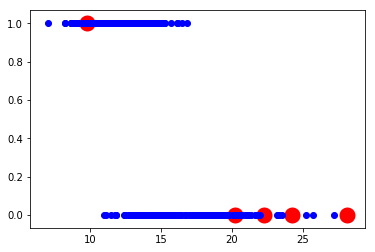

In [42]:
for training_index in range(len(training_data)):
    if training_predictions[training_index]==1:
        plt.scatter(training_data[feature_selected][training_index],
                   training_targets[0][training_index], c="blue")
    else:
        plt.scatter(training_data[feature_selected][training_index],
                   training_targets[0][training_index], c= "red", linewidths = 10)
plt.show()

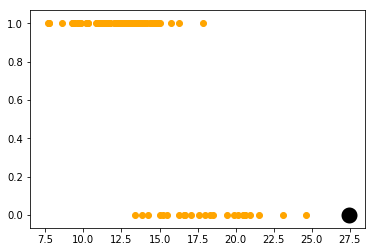

In [44]:
for test_index in range(len(test_data)):
    test_index_adj = test_index + 455
    if test_predictions[test_index]==1:
        plt.scatter(test_data[feature_selected][test_index_adj],
                   test_targets[0][test_index_adj], c="orange")
    else:
        plt.scatter(test_data[feature_selected][test_index_adj],
                   test_targets[0][test_index_adj], c= "black", linewidths = 10)
plt.show()